# Exercise 2.5:
![Exercise 2.5](images/Exercise2.5-Sutton.jpeg)

In [1]:
import numpy as np

class Bandit:
    
    def __init__(self, mu = 1, k = 10):
        """
        By default creates an array of size k and mean of 1 which represents the q*(a).
        """
        self.Qstars = np.ones(k) * mu
        #print(self.Qstars)
        
    def __step(self):
        for i in range(0, len(self.Qstars)):
            self.Qstars[i] += np.random.normal(0, 0.01)
        #print(self.Qstars)
            
    def pull_a_bandit(self, lever):
        if lever < len(self.Qstars) and lever >=0:
            reward = np.random.normal(self.Qstars[lever], 1)
            self.__step()
            return reward
        else:
            raise Exception(f"Number {lever} out of range")
            
    def print_bandit_content(self):
        print(self.Qstars)

```python
# The way to run the bandit
bandit = Bandit()

for i in range(1000):
    x = bandit.pull_a_bandit(7)
    print("x = ",x)
    bandit.print_bandit_content()
```

In [2]:
class Bandit_Agent:
    
    def __init__(self, bandit):
        self.action_values = np.zeros(10) # Q(a)
        self.counts = np.zeros(10) # N(a)
        self.iteration_number = 0
        self.total_reward = 0
        self.bandit = bandit
        
    def greedy_update(self):
        self.iteration_number += 1
        action_index = np.argmax(self.action_values) # Choose the best action
        reward = self.bandit.pull_a_bandit(action_index) # Get the reward from the bandit
        self.total_reward += reward # Add the reward to the accumulated reward
        self.counts[action_index] += 1 # Increment the number of that action
        self.action_values[action_index] = self.action_values[action_index] + (reward - self.action_values[action_index])/self.counts[action_index]
        return self.total_reward/self.iteration_number
    
    def epsilon_greedy_update(self, epsilon=0.01):
        self.iteration_number += 1
        if np.random.rand() > epsilon:
            action_index = np.argmax(self.action_values) # Choose the best action
        else:
            action_index = np.random.randint(0,10) # Choose a random action
        reward = self.bandit.pull_a_bandit(action_index) # Get the reward from the bandit
        self.total_reward += reward # Add the reward to the accumulated reward
        self.counts[action_index] += 1 # Increment the number of that action
        self.action_values[action_index] = self.action_values[action_index] + (reward - self.action_values[action_index])/self.counts[action_index]
        return self.total_reward/self.iteration_number
    
    def epsilon_greedy_constant_update(self, epsilon=0.1, alpha=0.1):
        self.iteration_number += 1
        if np.random.rand() > epsilon:
            action_index = np.argmax(self.action_values) # Choose the best action
        else:
            action_index = np.random.randint(0,10) # Choose a random action
        reward = self.bandit.pull_a_bandit(action_index) # Get the reward from the bandit
        self.total_reward += reward # Add the reward to the accumulated reward
        self.counts[action_index] += 1 # Increment the number of that action
        self.action_values[action_index] = self.action_values[action_index] + alpha * (reward - self.action_values[action_index])
        return self.total_reward/self.iteration_number
        
    def obj_print(self):
        print(f"{self.action_values},avg_reward={self.total_reward/self.iteration_number},best_action={self.best_action()}")
        
    def best_action(self):
        return np.max(self.action_values)

In [3]:
agent_greedy_bandit = Bandit()
agent_greedy = Bandit_Agent(bandit = agent_greedy_bandit)

agent_epsilon_bandit = Bandit()
agent_epsilon = Bandit_Agent(bandit = agent_epsilon_bandit)

agent_constant_update_bandit = Bandit()
agent_constant_update = Bandit_Agent(bandit = agent_constant_update_bandit)

EPOCHS = 10000
greedy_rewards = np.zeros(EPOCHS)
epsilon_greedy_rewards = np.zeros(EPOCHS)
epsilon_greedy_constant_rewards = np.zeros(EPOCHS)
for i in range(0,EPOCHS):
    greedy_rewards[i] = agent_greedy.greedy_update()
    epsilon_greedy_rewards[i] = agent_epsilon.epsilon_greedy_update(epsilon=0.1)
    epsilon_greedy_constant_rewards[i] = agent_constant_update.epsilon_greedy_constant_update(epsilon=0.1, alpha=0.1)

In [4]:
agent_greedy.obj_print()
agent_epsilon.obj_print()
agent_constant_update.obj_print()

[0.67404386 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ],avg_reward=0.674043857236479,best_action=0.6740438572364772
[1.29157899 0.25815106 1.47616308 1.04483513 1.37435615 0.83785163
 0.14072754 1.96582962 1.16858391 0.82223403],avg_reward=1.6537846292230818,best_action=1.965829620457005
[ 3.86138175  1.21520957  3.09373603 -0.5659104   1.97042654  1.48565515
  2.02820621  1.34451054 -1.07851283  1.94040656],avg_reward=2.610325739841164,best_action=3.861381749066496


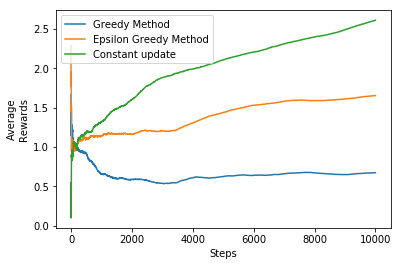

In [5]:
import matplotlib.pyplot as plt

x = np.arange(0, EPOCHS)
greedy_plot, = plt.plot(x,greedy_rewards[x])
epsilog_greedy, = plt.plot(x,epsilon_greedy_rewards[x])
epsilon_greedy_constant, = plt.plot(x,epsilon_greedy_constant_rewards[x])
plt.xlabel("Steps")
plt.ylabel("Average\nRewards")
plt.legend([greedy_plot,epsilog_greedy, epsilon_greedy_constant],["Greedy Method", "Epsilon Greedy Method", "Constant update"])
plt.show()